## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset**, which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [19]:
import pandas as pd

# URL to the CSV file
url = "https://github.com/kflisikowski/ds/raw/master/headache.csv"

# Load the data into a DataFrame
headache = pd.read_csv(url)

# Display the first few rows of the data
print(headache.head())

   id gender risk treatment  pain_score
0   1   male  low         X   79.311695
1   2   male  low         X   76.843399
2   3   male  low         X   70.832421
3   4   male  low         X   81.163944
4   5   male  low         X   75.052213


## Unique values

In [20]:
print("Distinct values for risk column: ", headache['risk'].unique())
print("Distinct values for treatment column: ",headache['treatment'].unique())
print("Distinct values for gender column: ", headache['gender'].unique())


Distinct values for risk column:  ['low' 'high']
Distinct values for treatment column:  ['X' 'Y' 'Z']
Distinct values for gender column:  ['male' 'female']


## Descriptive statistic

In [21]:
print("Descriptive statistics for treatment:\n", headache.groupby('treatment')['pain_score'].describe())
print("\nDescriptive statistics for risk:\n", headache.groupby('risk')['pain_score'].describe())
print("\nDescriptive statistics for gender:\n", headache.groupby('gender')['pain_score'].describe())


Descriptive statistics for treatment:
            count       mean       std        min        25%        50%  \
treatment                                                                
X           24.0  80.452980  8.570652  68.360185  74.805468  78.951823   
Y           24.0  76.254386  7.307459  63.732617  69.799297  76.427241   
Z           24.0  76.237824  5.883821  65.449408  71.645371  75.356318   

                 75%         max  
treatment                         
X          83.566224  100.000000  
Y          81.673404   91.178517  
Z          80.640990   87.142265  

Descriptive statistics for risk:
       count       mean       std        min        25%        50%        75%  \
risk                                                                           
high   36.0  82.639438  6.423179  68.360185  79.481148  81.503507  85.365774   
low    36.0  72.657355  4.658387  63.732617  68.919388  73.101676  75.121665   

             max  
risk              
high  100.000000  
lo

## Boxplots

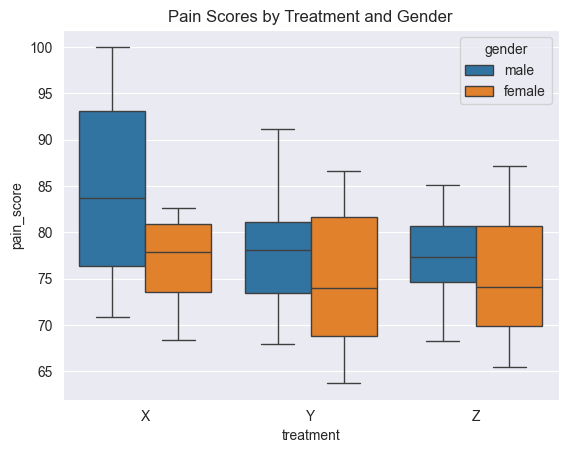

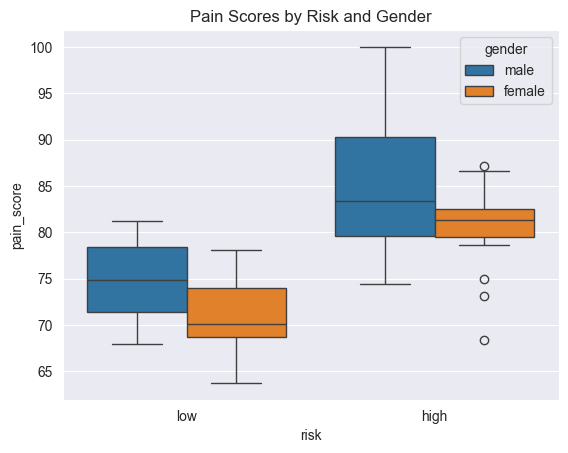

As we can see 4 outliers for high risk for female exist


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=headache, x='treatment', y='pain_score', hue='gender')
plt.title("Pain Scores by Treatment and Gender")
plt.show()


sns.boxplot(data=headache, x='risk', y='pain_score', hue='gender')
plt.title("Pain Scores by Risk and Gender")
plt.show()

print("As we can see 4 outliers for high risk for female exist")

## Testing Normality


In [23]:
from scipy.stats import shapiro

shapiro_results1 = headache.groupby('treatment')['pain_score'].apply(lambda x: shapiro(x))

shapiro_df1 = pd.DataFrame({
    'cyl': shapiro_results1.index,
    'W': [result[0] for result in shapiro_results1],
    'p-value': [result[1] for result in shapiro_results1]
})

shapiro_results2 = headache.groupby('risk')['pain_score'].apply(lambda x: shapiro(x))

shapiro_df2 = pd.DataFrame({
    'cyl': shapiro_results2.index,
    'W': [result[0] for result in shapiro_results2],
    'p-value': [result[1] for result in shapiro_results2]
})

shapiro_results3 = headache.groupby('gender')['pain_score'].apply(lambda x: shapiro(x))

shapiro_df3 = pd.DataFrame({
    'cyl': shapiro_results3.index,
    'W': [result[0] for result in shapiro_results3],
    'p-value': [result[1] for result in shapiro_results3]
})

print("Results of checking normality for treatment kinds to pain score:\n", shapiro_df1)
print("Results of checking normality for risk kinds to pain score:\n", shapiro_df2)
print("Results of checking normality for gender to pain score:\n", shapiro_df3)

print("\nTaking into account level of significance (alpha): 5% \nAll groups can be check with normality assumed")

Results of checking normality for treatment kinds to pain score:
   cyl         W   p-value
0   X  0.938849  0.153762
1   Y  0.974090  0.767455
2   Z  0.965303  0.553714
Results of checking normality for risk kinds to pain score:
     cyl         W   p-value
0  high  0.954292  0.142703
1   low  0.969309  0.406972
Results of checking normality for gender to pain score:
       cyl         W   p-value
0  female  0.955539  0.156153
1    male  0.948719  0.095301

Taking into account level of significance (alpha): 5% 
All groups can be check with normality assumed


## QQ Plots


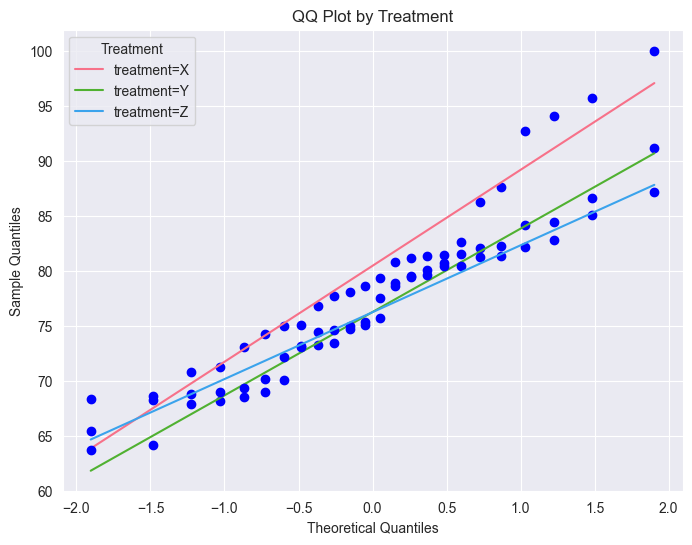

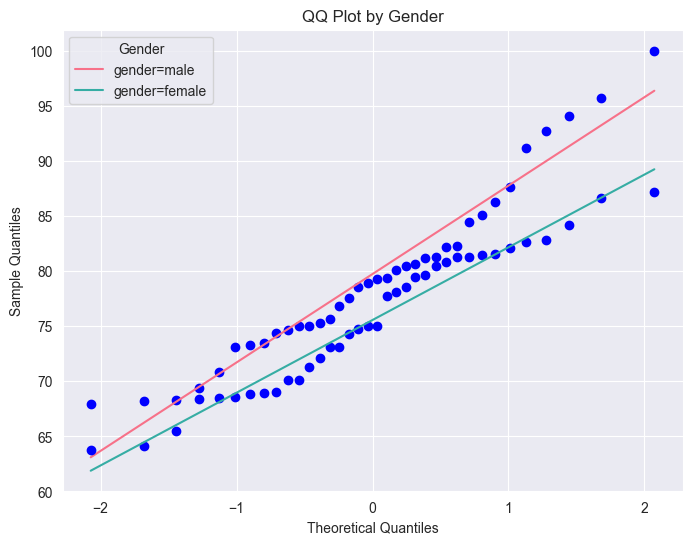

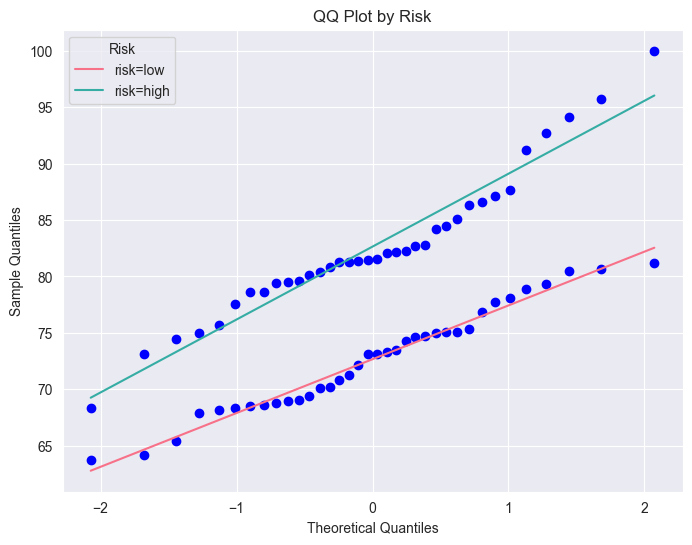

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create QQ plots with different colors
def qq_plot_by_group(data, group_col, value_col):
    unique_groups = data[group_col].unique()
    colors = sns.color_palette("husl", len(unique_groups))  # Generate unique colors
    plt.figure(figsize=(8, 6))

    for group, color in zip(unique_groups, colors):
        subset = data[data[group_col] == group]
        stats.probplot(subset[value_col], dist="norm", plot=plt)
        line = plt.gca().get_lines()[-1]
        line.set_color(color)  # Set the color of the QQ line
        line.set_label(f'{group_col}={group}')

    plt.legend(title=group_col.capitalize())
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'QQ Plot by {group_col.capitalize()}')
    plt.grid(True)
    plt.show()

# QQ Plot for Treatment
qq_plot_by_group(headache, 'treatment', 'pain_score')

# QQ Plot for Gender
qq_plot_by_group(headache, 'gender', 'pain_score')

# QQ Plot for Risk
qq_plot_by_group(headache, 'risk', 'pain_score')


## Testing homogeneity of variances


In [25]:
from scipy.stats import levene

stat_treatment, p_treatment = levene(
    headache[headache['treatment'] == 'X']['pain_score'],
    headache[headache['treatment'] == 'Y']['pain_score'],
    headache[headache['treatment'] == 'Z']['pain_score']
)
print(f"Levene's test for treatment groups:")
print(f"Statistic: {stat_treatment:.3f}, p-value: {p_treatment:.3f}")

stat_risk, p_risk = levene(
    headache[headache['risk'] == 'low']['pain_score'],
    headache[headache['risk'] == 'high']['pain_score']
)
print(f"\nLevene's test for risk groups:")
print(f"Statistic: {stat_risk:.3f}, p-value: {p_risk:.3f}")

stat_gender, p_gender = levene(
    headache[headache['gender'] == 'male']['pain_score'],
    headache[headache['gender'] == 'female']['pain_score']
)
print(f"\nLevene's test for gender groups:")
print(f"Statistic: {stat_gender:.3f}, p-value: {p_gender:.3f}")

print("\nTaking into account level of significance (alpha): 5% \nFor all groups we can assume homogeneity of variance ")

Levene's test for treatment groups:
Statistic: 0.824, p-value: 0.443

Levene's test for risk groups:
Statistic: 0.545, p-value: 0.463

Levene's test for gender groups:
Statistic: 0.201, p-value: 0.656

Taking into account level of significance (alpha): 5% 
For all groups we can assume homogeneity of variance 


## ANOVA tables


### 1 way ANOVA

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('pain_score ~ treatment', data=headache).fit()
anova_results1 = sm.stats.anova_lm(model, typ=2)

model = ols('pain_score ~ risk', data=headache).fit()
anova_results2 = sm.stats.anova_lm(model, typ=2)

model = ols('pain_score ~ gender', data=headache).fit()
anova_results3 = sm.stats.anova_lm(model, typ=2)

print("1 way ANOVA table for treatment:\n", anova_results1)
print("\n1 way ANOVA table for risk:\n", anova_results2)
print("\n1 way ANOVA table for gender:\n", anova_results3)

1 way ANOVA table for treatment:
                 sum_sq    df         F    PR(>F)
treatment   283.168031   2.0  2.630461  0.079261
Residual   3713.910950  69.0       NaN       NaN

1 way ANOVA table for risk:
                sum_sq    df          F        PR(>F)
risk      1793.555757   1.0  56.976437  1.238366e-10
Residual  2203.523224  70.0        NaN           NaN

1 way ANOVA table for gender:
                sum_sq    df         F    PR(>F)
gender     313.358773   1.0  5.954609  0.017214
Residual  3683.720208  70.0       NaN       NaN


### 2 way ANOVA

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('pain_score ~ treatment * gender', data=headache).fit()
anova_results4 = sm.stats.anova_lm(model, typ=2)

model = ols('pain_score ~ risk * gender', data=headache).fit()
anova_results5 = sm.stats.anova_lm(model, typ=2)

model = ols('pain_score ~ treatment * risk', data=headache).fit()
anova_results6 = sm.stats.anova_lm(model, typ=2)

print("2 way ANOVA table for treatment * gender:\n", anova_results4)
print("\n2 way ANOVA table for risk * gender:\n", anova_results5)
print("\n2 way ANOVA table for treatment * risk :\n", anova_results6)

2 way ANOVA table for treatment * gender:
                        sum_sq    df         F    PR(>F)
treatment          283.168031   2.0  2.856462  0.064600
gender             313.358773   1.0  6.322024  0.014370
treatment:gender   129.182324   2.0  1.303129  0.278578
Residual          3271.369853  66.0       NaN       NaN

2 way ANOVA table for risk * gender:
                   sum_sq    df          F        PR(>F)
risk         1793.555757   1.0  64.617783  1.865306e-11
gender        313.358773   1.0  11.289612  1.281331e-03
risk:gender     2.730584   1.0   0.098377  7.547464e-01
Residual     1887.433867  68.0        NaN           NaN

2 way ANOVA table for treatment * risk :
                      sum_sq    df          F        PR(>F)
treatment        283.168031   2.0   4.936994  1.004347e-02
risk            1793.555757   1.0  62.540771  3.864188e-11
treatment:risk    27.595016   2.0   0.481115  6.202444e-01
Residual        1892.760177  66.0        NaN           NaN


### 3 way ANOVA

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('pain_score ~ treatment * risk * gender', data=headache).fit()
anova_results7 = sm.stats.anova_lm(model, typ=2)

print("3 way ANOVA table for treatment * risk * gender:\n", anova_results7)

3 way ANOVA table for treatment * risk * gender:
                             sum_sq    df          F        PR(>F)
treatment               283.168031   2.0   7.317679  1.432844e-03
risk                   1793.555757   1.0  92.698774  8.799980e-14
gender                  313.358773   1.0  16.195746  1.625409e-04
treatment:risk           27.595016   2.0   0.713115  4.942214e-01
treatment:gender        129.182324   2.0   3.338353  4.220011e-02
risk:gender               2.730584   1.0   0.141128  7.084867e-01
treatment:risk:gender   286.595625   2.0   7.406255  1.334476e-03
Residual               1160.892871  60.0        NaN           NaN


## Post-hoc tests


Tukey's HSD test results for treatment:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y  -4.1986 0.1242 -9.2716 0.8744  False
     X      Z  -4.2152 0.1222 -9.2881 0.8578  False
     Y      Z  -0.0166    1.0 -5.0895 5.0564  False
---------------------------------------------------


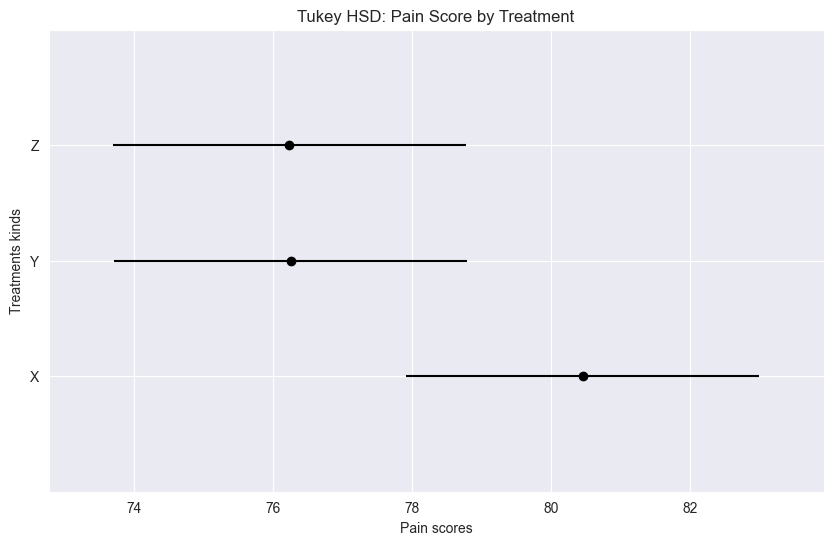

Tukey's HSD test results for risk:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  high    low  -9.9821   0.0 -12.6196 -7.3446   True
----------------------------------------------------


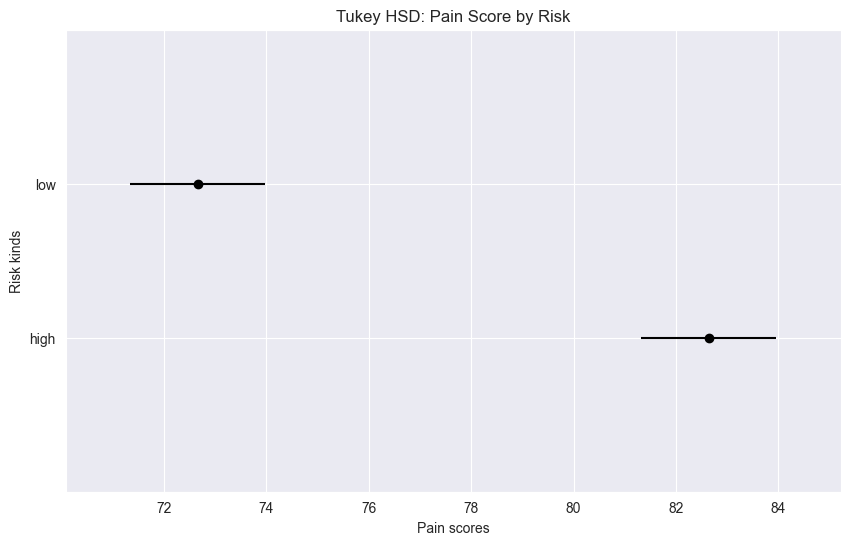

Tukey's HSD test results for gender:

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
female   male   4.1724 0.0172 0.7622 7.5826   True
--------------------------------------------------


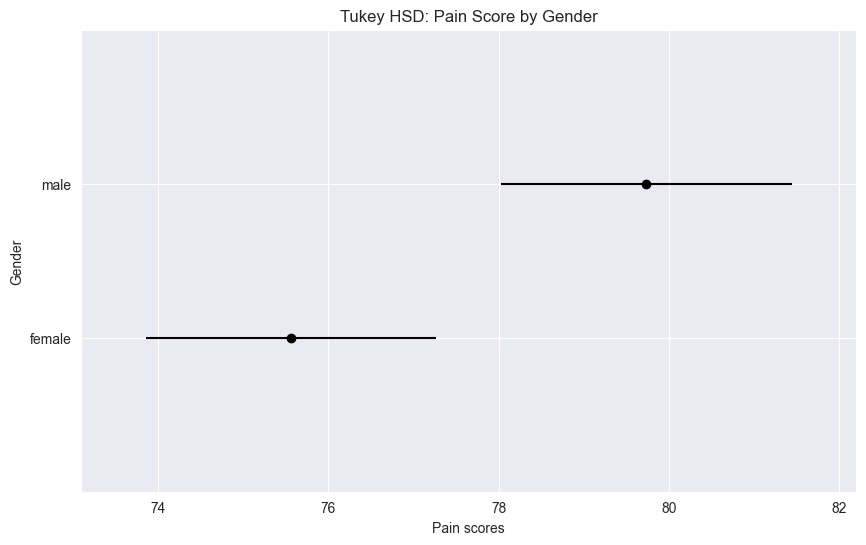

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_treatment = pairwise_tukeyhsd(
    endog=headache['pain_score'],
    groups=headache['treatment'],
    alpha=0.05
)

print("Tukey's HSD test results for treatment:\n")
print(tukey_treatment)

tukey_treatment.plot_simultaneous()
plt.title("Tukey HSD: Pain Score by Treatment")
plt.xlabel('Pain scores')
plt.ylabel('Treatments kinds')
plt.show()

tukey_risk = pairwise_tukeyhsd(
    endog=headache['pain_score'],
    groups=headache['risk'],
    alpha=0.05
)

print("Tukey's HSD test results for risk:\n")
print(tukey_risk)

tukey_risk.plot_simultaneous()
plt.title("Tukey HSD: Pain Score by Risk")
plt.xlabel('Pain scores')
plt.ylabel('Risk kinds')
plt.show()

tukey_gender = pairwise_tukeyhsd(
    endog=headache['pain_score'],
    groups=headache['gender'],
    alpha=0.05
)

print("Tukey's HSD test results for gender:\n")
print(tukey_gender)

tukey_gender.plot_simultaneous()
plt.title("Tukey HSD: Pain Score by Gender")
plt.xlabel('Pain scores')
plt.ylabel('Gender')
plt.show()
